<a href="https://colab.research.google.com/github/yakinotniel/fpgrowth/blob/main/FP_GROWTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!kaggle datasets download -d arnavsmayan/netflix-userbase-dataset

Dataset URL: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset
License(s): Apache 2.0
  0% 0.00/25.1k [00:00<?, ?B/s]
100% 25.1k/25.1k [00:00<00:00, 35.3MB/s]


In [ ]:
import os
import zipfile

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
local_zip = '/content/netflix-userbase-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/fpgrowth')
zip_ref.close()

In [ ]:
data = pd.read_csv('/content/fpgrowth/Netflix Userbase.csv')
data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
df = pd.DataFrame(data)

# Data preprocessing: Convert categorical data to one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['User ID', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Age']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply ECLAT algorithm using FP-Growth and Apriori
min_support_values = [0.1, 0.15, 0.2, 0.25, 0.3]
frequent_itemsets_fpgrowth = {}
frequent_itemsets_apriori = {}

for min_support in min_support_values:
    frequent_itemsets_fpgrowth[min_support] = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)
    frequent_itemsets_apriori[min_support] = apriori(df_encoded, min_support=min_support, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Analyze frequent itemsets
for min_support, itemsets in frequent_itemsets_fpgrowth.items():
    print(f"Frequent itemsets with FP-Growth, min_support = {min_support}")
    print(itemsets)
    print()

for min_support, itemsets in frequent_itemsets_apriori.items():
    print(f"Frequent itemsets with Apriori, min_support = {min_support}")
    print(itemsets)
    print()

Frequent itemsets with FP-Growth, min_support = 0.1
    support                                           itemsets
0    1.0000                            (Plan Duration_1 Month)
1    0.4972                                      (Gender_Male)
2    0.3996                          (Subscription Type_Basic)
3    0.2484                                (Device_Smartphone)
4    0.1804                            (Country_United States)
5    0.5028                                    (Gender_Female)
6    0.2932                        (Subscription Type_Premium)
7    0.2532                                    (Device_Tablet)
8    0.1268                                   (Country_Canada)
9    0.3072                       (Subscription Type_Standard)
10   0.2440                                  (Device_Smart TV)
11   0.2544                                    (Device_Laptop)
12   0.1804                                    (Country_Spain)
13   0.4972               (Gender_Male, Plan Duration_1 Month)
14 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate and analyze association rules for the highest support threshold
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth[min_support_values[0]], metric="lift", min_threshold=1.0)
rules_apriori = association_rules(frequent_itemsets_apriori[min_support_values[0]], metric="lift", min_threshold=1.0)

print("Association Rules with FP-Growth")
print(rules_fpgrowth)

print("Association Rules with Apriori")
print(rules_apriori)

Association Rules with FP-Growth
                      antecedents  \
0                   (Gender_Male)   
1         (Plan Duration_1 Month)   
2         (Plan Duration_1 Month)   
3       (Subscription Type_Basic)   
4                 (Gender_Female)   
..                            ...   
107               (Device_Laptop)   
108  (Gender_Male, Device_Laptop)   
109       (Plan Duration_1 Month)   
110               (Country_Spain)   
111       (Plan Duration_1 Month)   

                                          consequents  antecedent support  \
0                             (Plan Duration_1 Month)              0.4972   
1                                       (Gender_Male)              1.0000   
2                           (Subscription Type_Basic)              1.0000   
3                             (Plan Duration_1 Month)              0.3996   
4                           (Subscription Type_Basic)              0.5028   
..                                                ...       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save results to CSV files
frequent_itemsets_fpgrowth[min_support_values[0]].to_csv('frequent_itemsets_fpgrowth.csv', index=False)
frequent_itemsets_apriori[min_support_values[0]].to_csv('frequent_itemsets_apriori.csv', index=False)
rules_fpgrowth.to_csv('rules_fpgrowth.csv', index=False)
rules_apriori.to_csv('rules_apriori.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


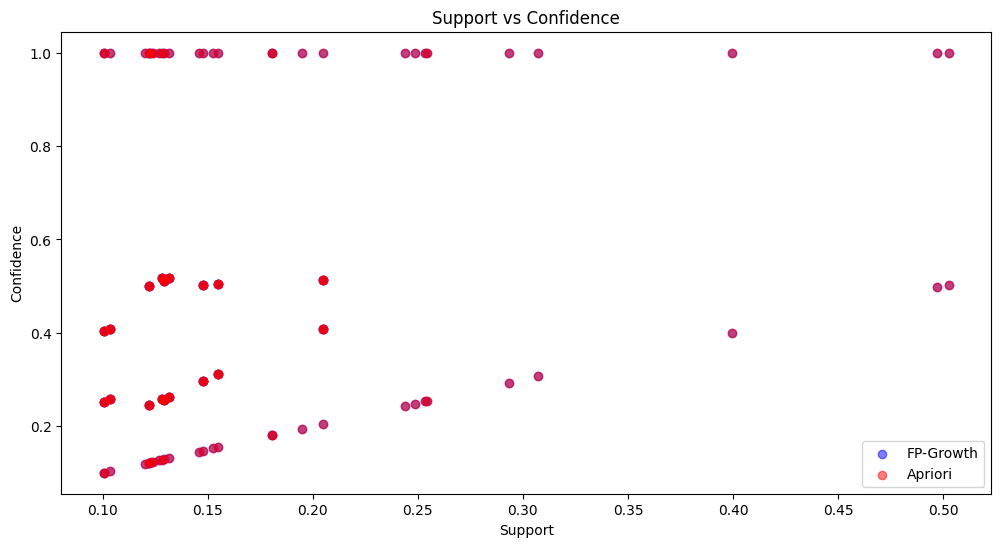

In [ ]:
# Visualizations

# Plotting support vs confidence for the association rules
plt.figure(figsize=(12, 6))
plt.scatter(rules_fpgrowth['support'], rules_fpgrowth['confidence'], alpha=0.5, c='blue', label='FP-Growth')
plt.scatter(rules_apriori['support'], rules_apriori['confidence'], alpha=0.5, c='red', label='Apriori')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


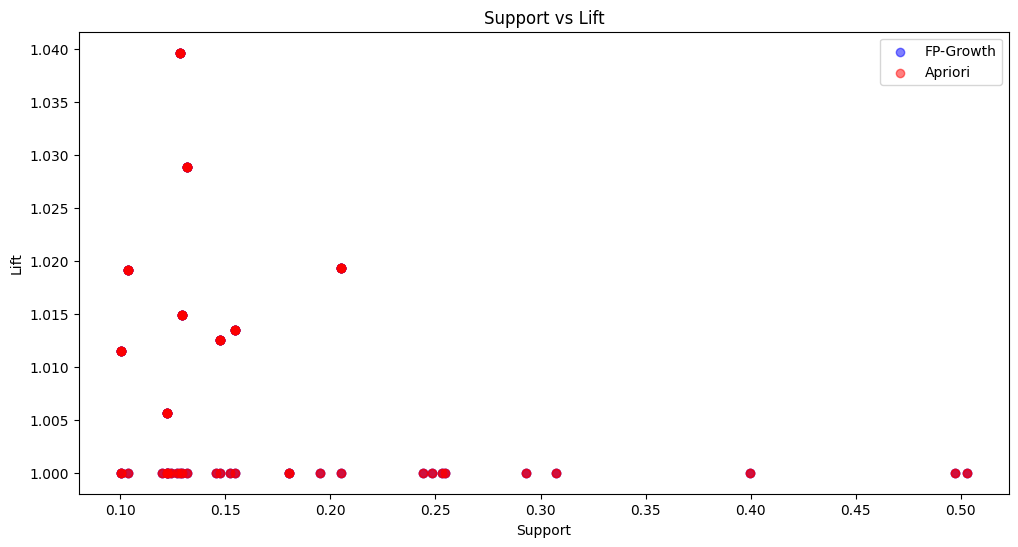

In [ ]:
# Plotting support vs lift for the association rules
plt.figure(figsize=(12, 6))
plt.scatter(rules_fpgrowth['support'], rules_fpgrowth['lift'], alpha=0.5, c='blue', label='FP-Growth')
plt.scatter(rules_apriori['support'], rules_apriori['lift'], alpha=0.5, c='red', label='Apriori')
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


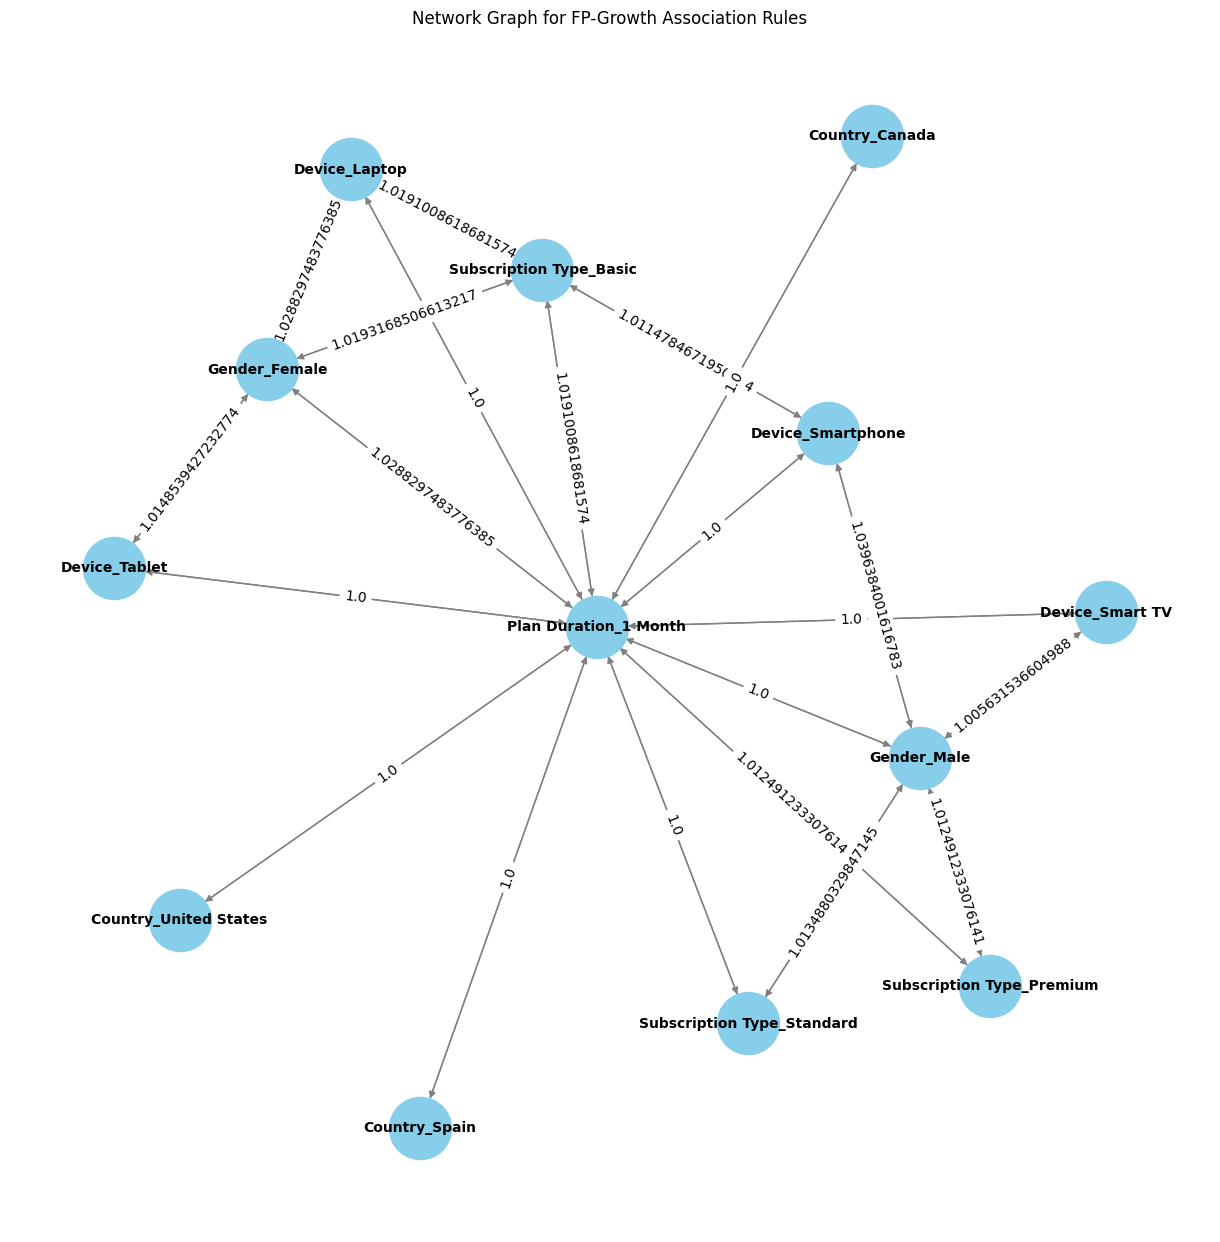

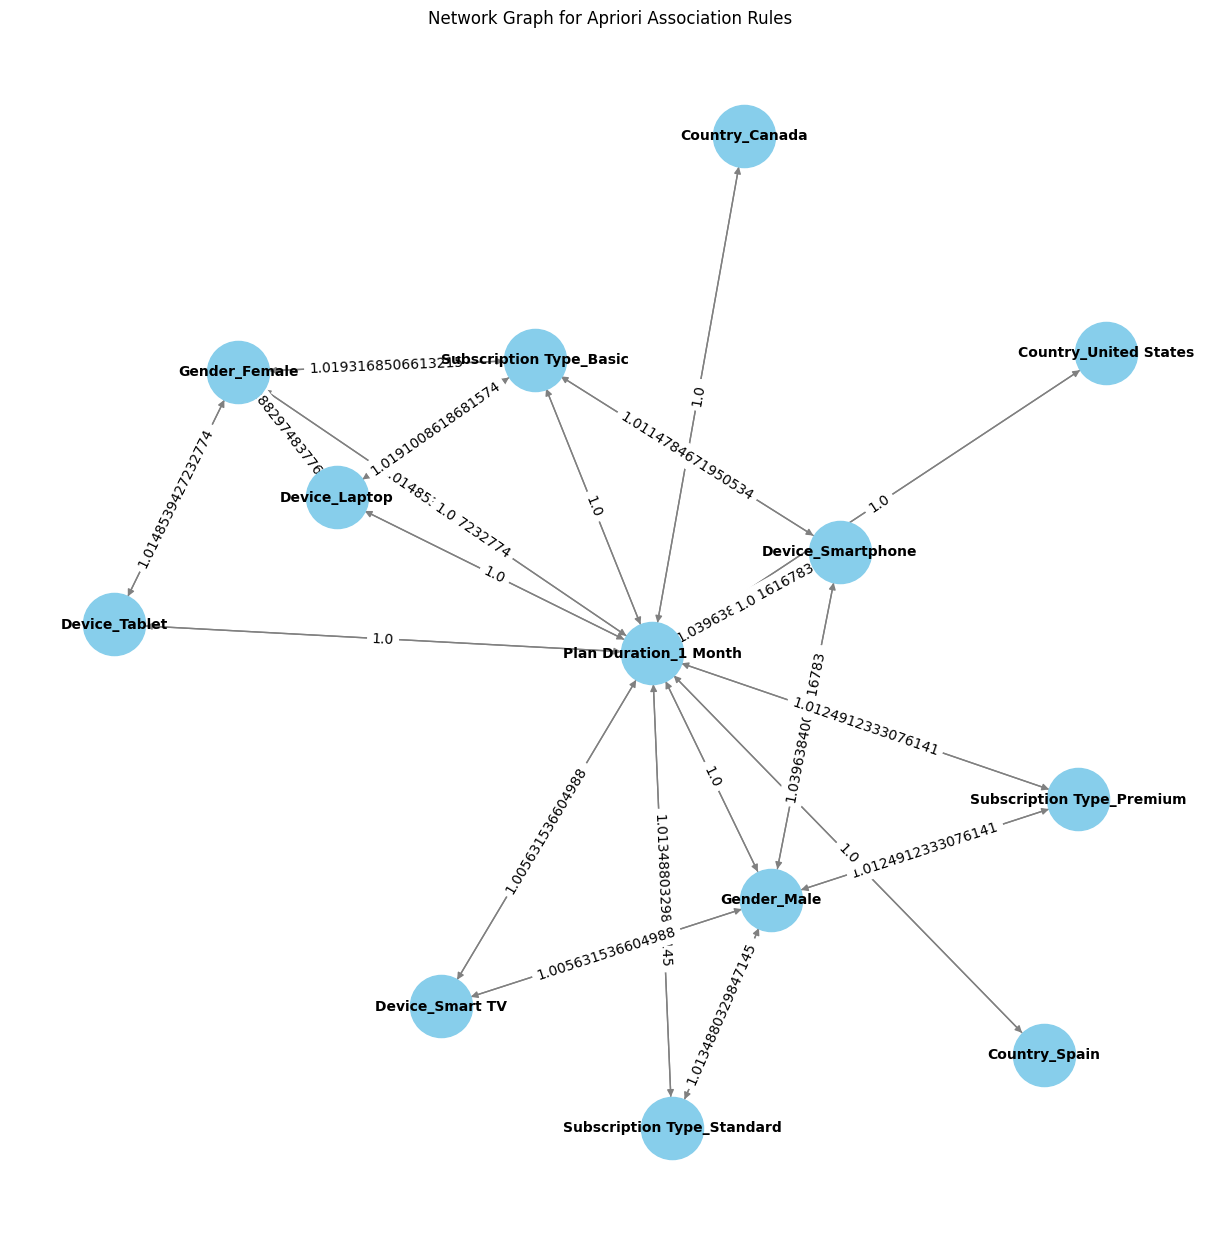

In [ ]:
# Network graph for association rules
def draw_graph(rules, rules_type):
    G = nx.DiGraph()
    for i, rule in rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='grey', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f'Network Graph for {rules_type} Association Rules')
    plt.show()

draw_graph(rules_fpgrowth, 'FP-Growth')
draw_graph(rules_apriori, 'Apriori')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-91a96f140d62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


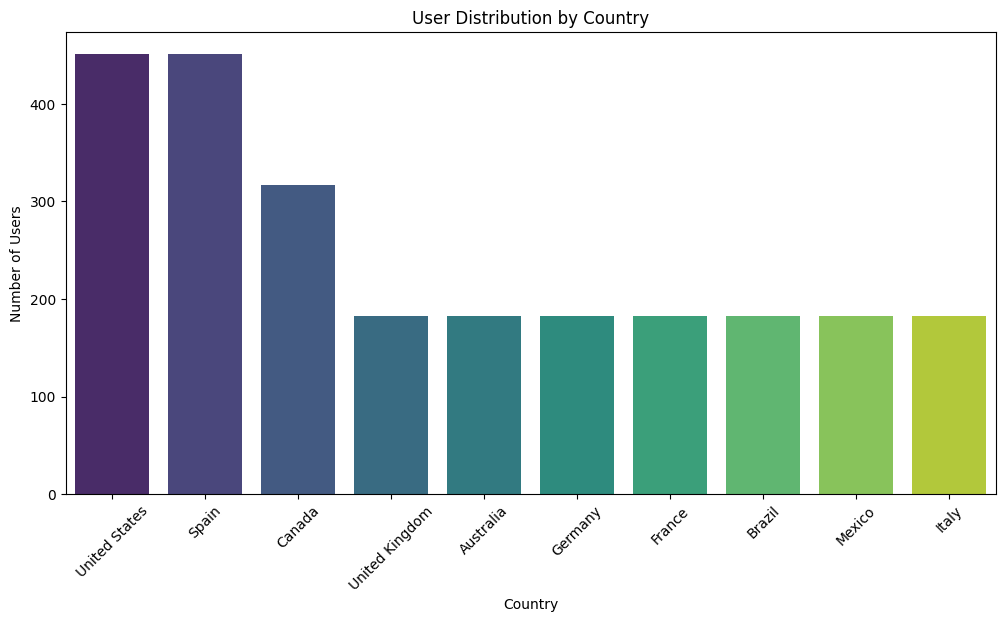

In [ ]:
# Segmentation Analysis
# Segment by Country
country_counts = df['Country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-9a4c41af74bf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


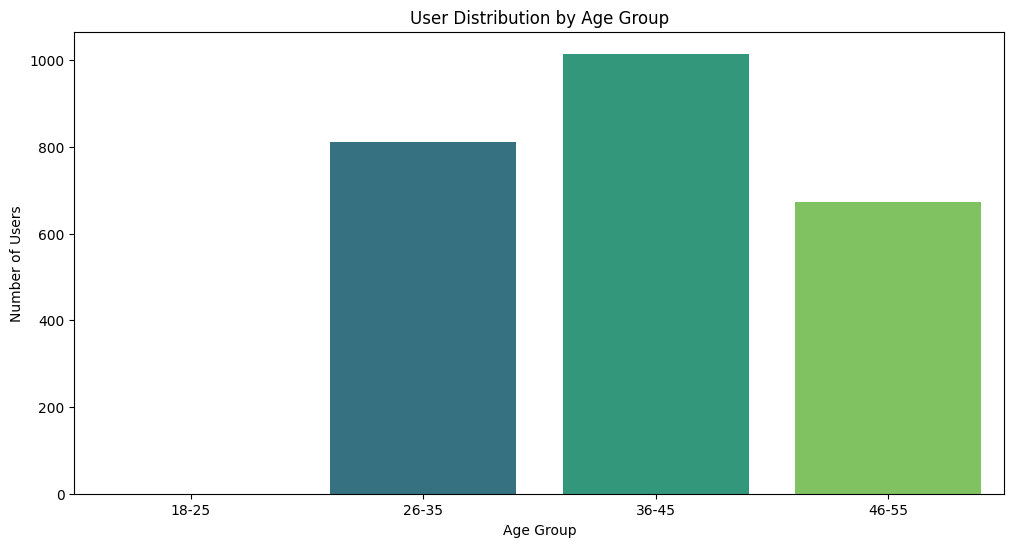

In [ ]:
# Segment by Age Groups
age_bins = [18, 25, 35, 45, 55]
age_labels = ['18-25', '26-35', '36-45', '46-55']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age Group'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


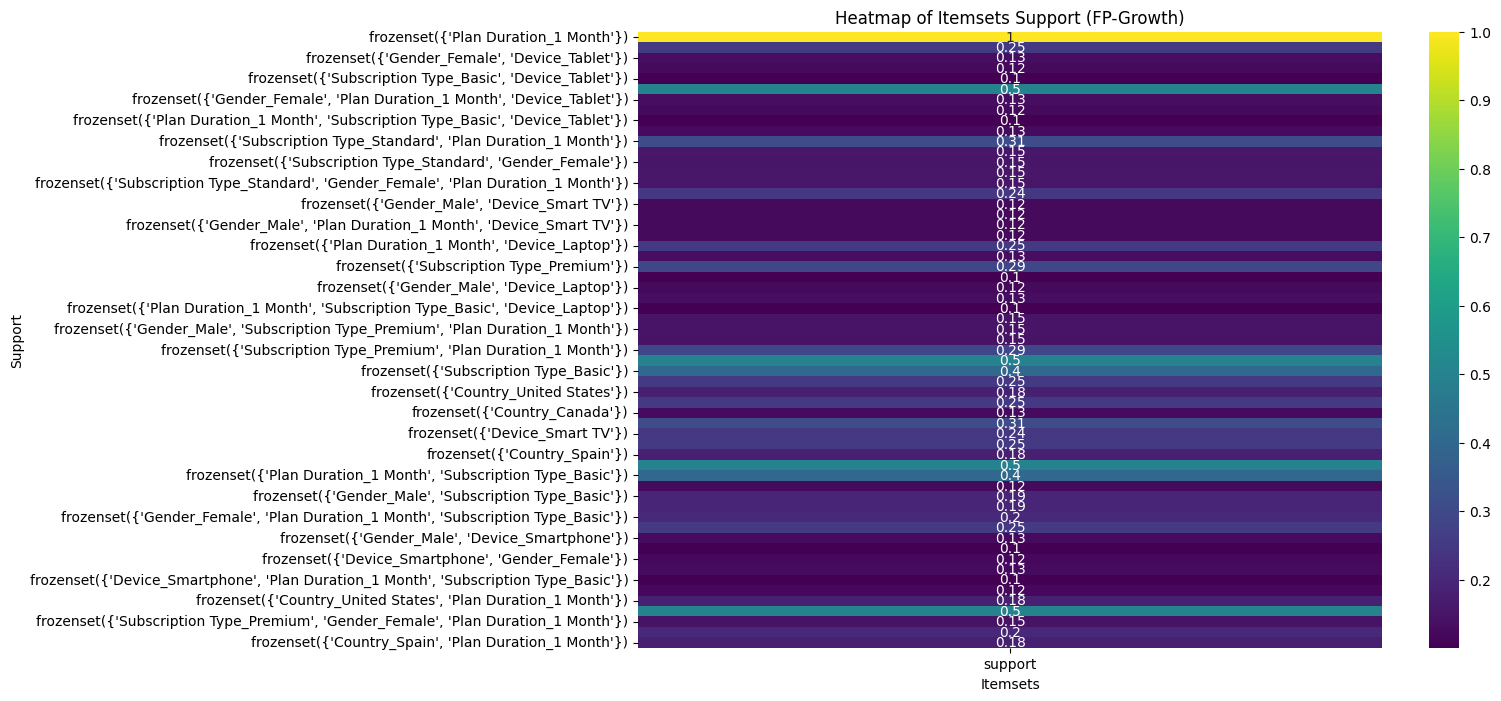

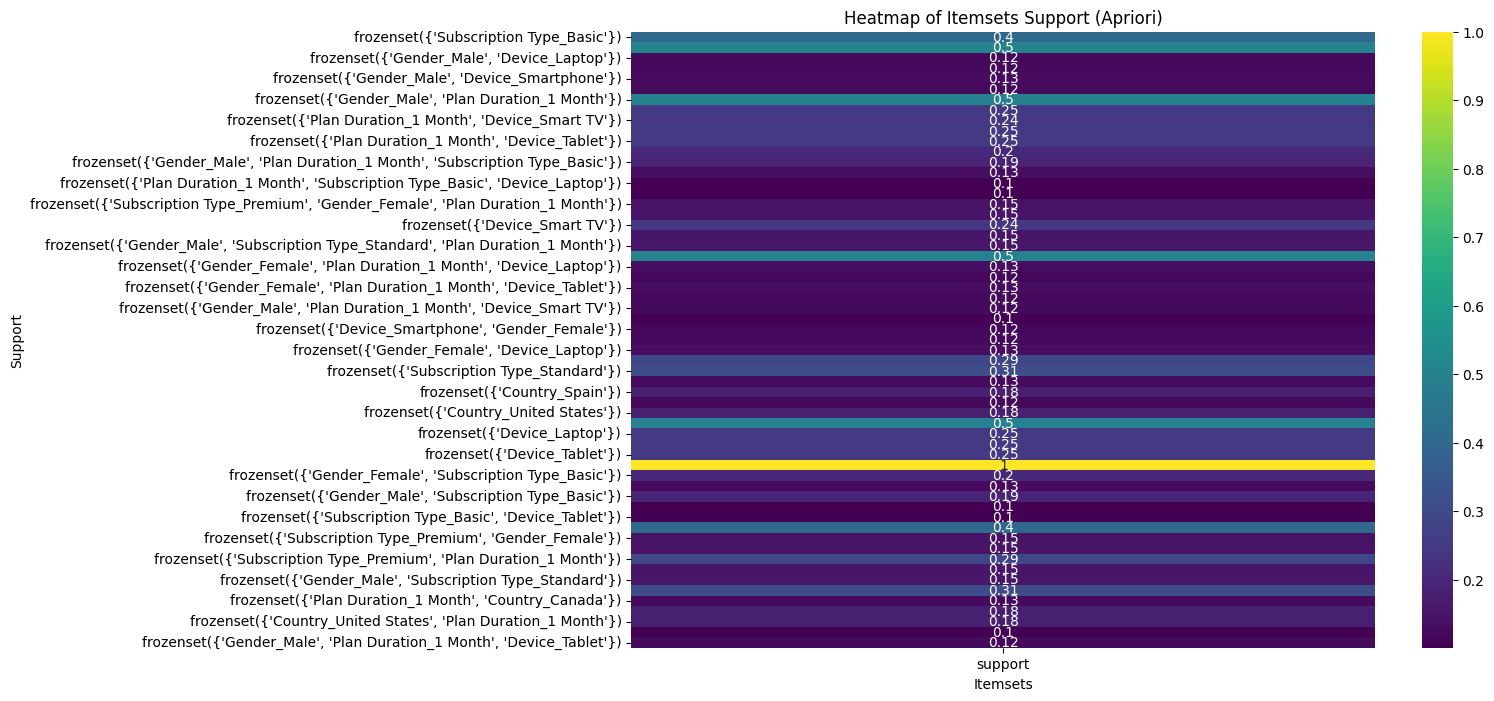

In [ ]:
# Heatmap of Support for Itemsets
# For the purpose of this example, we'll create a sample support matrix visualization
support_matrix_fpgrowth = frequent_itemsets_fpgrowth[min_support_values[0]].pivot_table(index='itemsets', values='support')
plt.figure(figsize=(12, 8))
sns.heatmap(support_matrix_fpgrowth, annot=True, cmap='viridis')
plt.title('Heatmap of Itemsets Support (FP-Growth)')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.show()

support_matrix_apriori = frequent_itemsets_apriori[min_support_values[0]].pivot_table(index='itemsets', values='support')
plt.figure(figsize=(12, 8))
sns.heatmap(support_matrix_apriori, annot=True, cmap='viridis')
plt.title('Heatmap of Itemsets Support (Apriori)')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.show()

In [ ]:
# Advanced Analysis - Lift Distribution by Country
rules_fpgrowth['Country'] = df['Country']
rules_apriori['Country'] = df['Country']

# Calculate average lift per country
average_lift_fpgrowth = rules_fpgrowth.groupby('Country')['lift'].mean()
average_lift_apriori = rules_apriori.groupby('Country')['lift'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-969014d7511f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_lift_fpgrowth.index, y=average_lift_fpgrowth.values, palette='viridis')


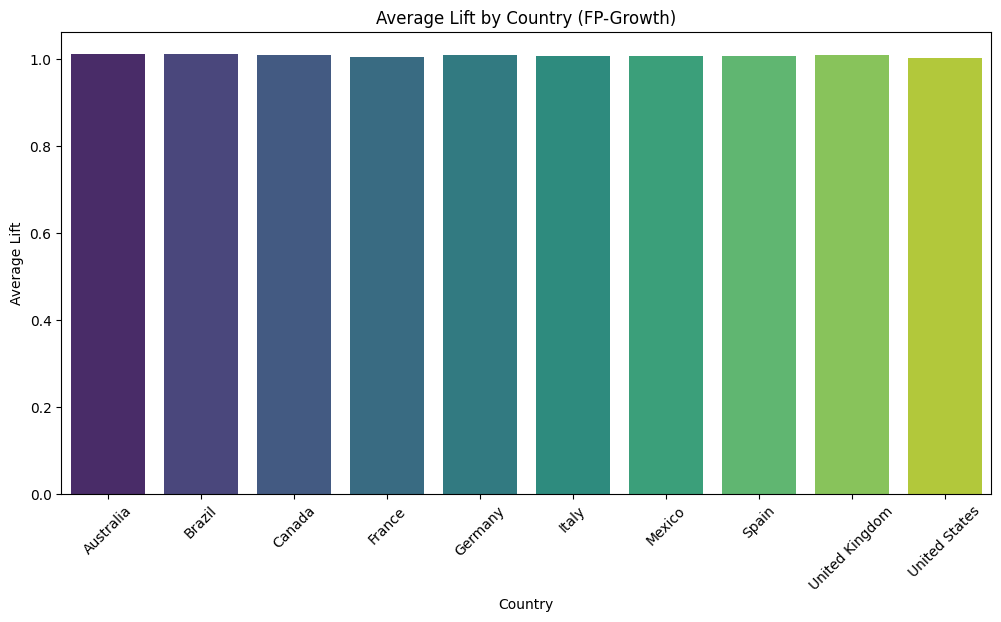

In [ ]:
# Plot average lift by country
plt.figure(figsize=(12, 6))
sns.barplot(x=average_lift_fpgrowth.index, y=average_lift_fpgrowth.values, palette='viridis')
plt.title('Average Lift by Country (FP-Growth)')
plt.xlabel('Country')
plt.ylabel('Average Lift')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-ea7ffe35ee78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_lift_apriori.index, y=average_lift_apriori.values, palette='viridis')


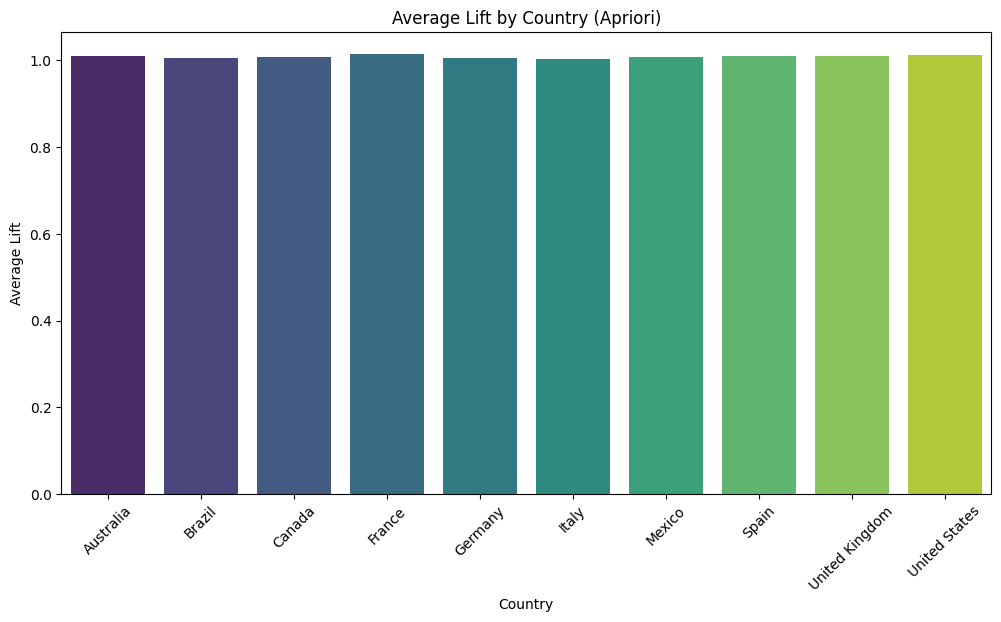

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_lift_apriori.index, y=average_lift_apriori.values, palette='viridis')
plt.title('Average Lift by Country (Apriori)')
plt.xlabel('Country')
plt.ylabel('Average Lift')
plt.xticks(rotation=45)
plt.show()